In [322]:
# encoding=utf8
import sys

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re

reload(sys)
sys.setdefaultencoding('utf8')

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [3]:
tweet_list = pd.read_csv('Data/train.csv', dtype={'keyword':'str'})
tweet_list.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [4]:
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
tweet_list.keyword.fillna('', inplace=True)
tweet_list.location.fillna('', inplace=True)
tweet_list.text.fillna('', inplace=True)
#tweet_list.tail()

# Comparacion de repetidos por target

In [6]:
text_list = tweet_list.groupby(['text','target']).size().reset_index(name='count')
repeated = text_list[text_list['count']>1].sort_values(by='count', ascending=False)
repeated[repeated.target==1].describe()

,target,count
count,45.0,45.000000
mean,1.0,2.444444
std,0.0,1.407053
min,1.0,2.000000
25%,1.0,2.000000
50%,1.0,2.000000
75%,1.0,2.000000
max,1.0,10.000000


In [7]:

repeated[repeated.target==0].describe()

,target,count
count,20.0,20.00000
mean,0.0,2.35000
std,0.0,0.67082
min,0.0,2.00000
25%,0.0,2.00000
50%,0.0,2.00000
75%,0.0,2.25000
max,0.0,4.00000


### Observacion
Se observa una marcada tendencia de repeticion de tweets verdaderos 

# Tweets con hashtag

In [8]:
hashtag_list = tweet_list[tweet_list.text.str.contains('#')]
hashtag_list.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1
5,8,,,#RockyFire Update => California Hwy. 20 closed...,1
6,10,,,#flood #disaster Heavy rain causes flash flood...,1


In [9]:
hashtag_list[hashtag_list.target == 1].describe()

,id,target
count,875.000000,875.0
mean,5647.180571,1.0
std,3085.817330,0.0
min,1.000000,1.0
25%,3141.000000,1.0
50%,5661.000000,1.0
75%,8261.500000,1.0
max,10867.000000,1.0


In [10]:
hashtag_list[hashtag_list.target == 0].describe()

,id,target
count,886.000000,886.0
mean,5148.013544,0.0
std,3170.663096,0.0
min,49.000000,0.0
25%,2399.750000,0.0
50%,5035.500000,0.0
75%,7763.750000,0.0
max,10837.000000,0.0



# Tweets con urls

In [11]:
url_list = tweet_list[tweet_list.text.str.contains('www|http')]
url_list.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1


In [12]:
url_list[url_list.target == 1].describe()

,id,target
count,2174.000000,2174.0
mean,5809.557498,1.0
std,3079.268498,0.0
min,48.000000,1.0
25%,3406.000000,1.0
50%,5799.000000,1.0
75%,8396.250000,1.0
max,10873.000000,1.0


In [13]:
url_list[url_list.target == 0].describe()

,id,target
count,1802.000000,1802.0
mean,5180.846282,0.0
std,3117.914445,0.0
min,49.000000,0.0
25%,2437.250000,0.0
50%,5165.500000,0.0
75%,7821.750000,0.0
max,10837.000000,0.0


# Cloud Words

In [19]:
stopwords = set(STOPWORDS) # Set de datos de las palabras inutiles para el analisis de textos
def word_cloud(data, title=None):
    cloud = WordCloud(background_color = 'black',
                     stopwords = stopwords,
                     max_words = 200,
                     max_font_size = 40,
                     scale = 3).generate(str(data))
    fig = plt.figure(figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.25)
        plt.imshow(cloud)
        plt.show()

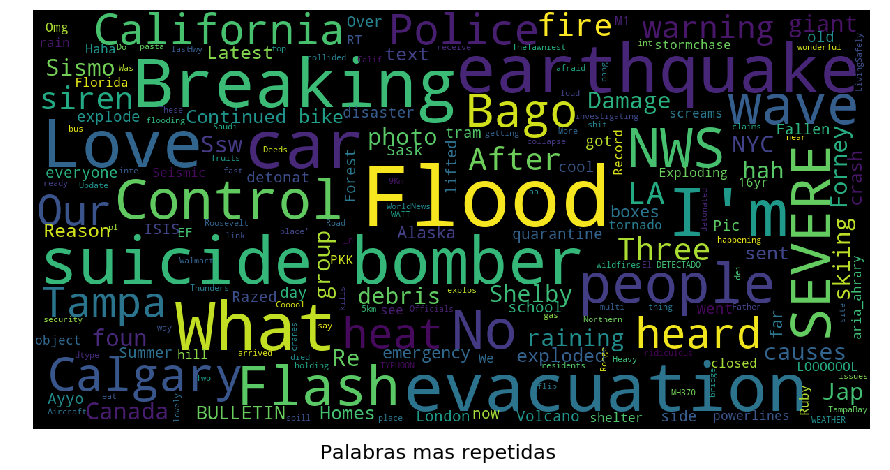

In [15]:
word_cloud(tweet_list.text,'Palabras mas repetidas')

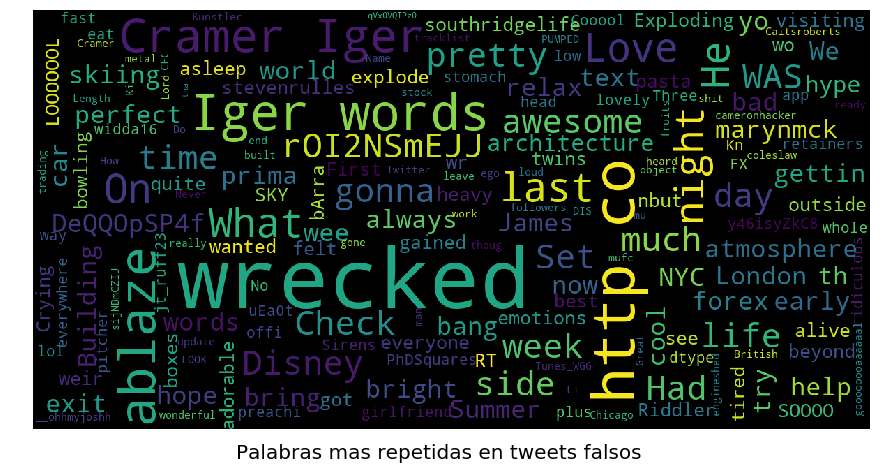

In [16]:
word_cloud(tweet_list[tweet_list.target==0].text,'Palabras mas repetidas en tweets falsos')

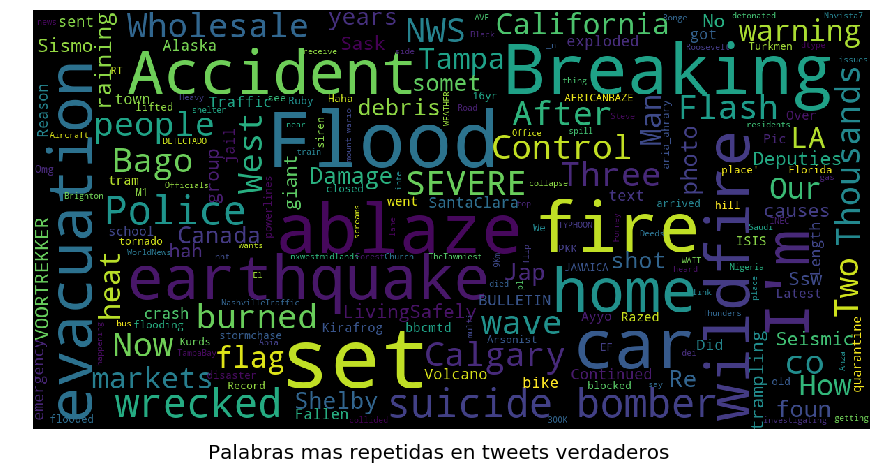

In [17]:
word_cloud(tweet_list[tweet_list.target==1].text,'Palabras mas repetidas en tweets verdaderos')

# Detalle del top 20 de palabras usadas (caracteres alfabeticos)

In [317]:
tweets_clear_text = tweet_list.text.apply(lambda x: ' '.join([word for word in x.split() if (word.lower() not in (stopwords) and word.isalpha())]))
top_20_word_list = Counter(" ".join(tweets_clear_text).split()).most_common(20)
piped_words = '|'.join([i[0] for i in top_20_word_list])
piped_words

'will|via|fire|people|one|new|got|now|New|know|video|going|California|killed|still|burning|see|back|go|time'

In [318]:
top_20_by_target_all = tweet_list[tweet_list.text.str.contains(piped_words)].groupby(['target']).size().reset_index(name='count')
top_20_by_target_all

,target,count
0,0,1743
1,1,1334


In [319]:
top_20_by_target = pd.DataFrame({'word': pd.Series([], dtype='str'), 'total_count': pd.Series([], dtype='int'), 'target_0': pd.Series([], dtype='int'), 'target_1': pd.Series([], dtype='int')})
top_20_by_target.word = [x[0] for x in top_20_word_list]

for index, word in enumerate(top_20_by_target.word):
    filtered_by_word = tweet_list[tweet_list.text.str.contains(word)]
    top_20_by_target.total_count[index] = filtered_by_word.shape[0]
    top_20_by_target.target_0[index] = filtered_by_word[filtered_by_word.target == 0].shape[0]
    top_20_by_target.target_1[index] = filtered_by_word[filtered_by_word.target == 1].shape[0]

top_20_by_target

,target_0,target_1,total_count,word
0,145.00,65.00,210.00,will
1,97.00,126.00,223.00,via
2,99.00,284.00,383.00,fire
3,72.00,93.00,165.00,people
4,405.00,201.00,606.00,one
5,148.00,115.00,263.00,new
6,95.00,35.00,130.00,got
7,228.00,99.00,327.00,now
8,123.00,198.00,321.00,New
9,90.00,35.00,125.00,know


In [321]:
# bar graphs
fig, ax = plt.subplots()
x = np.arange(top_20_by_target.shape[0])
width = 0.25

target_0 = top_20_by_target.target_0.to_numpy();
target_1 = top_20_by_target.target_1.to_numpy();

ax.bar(x, target_0, width, color='red')
ax.bar(x + width, target_1 , width, color='green')
ax.set_xticks(x + width)
ax.set_xticklabels(top_20_by_target.word, rotation='vertical')
plt.show()

# Detalle del top 20 de palabras usadas (caracteres no alfabeticos)

In [310]:
tweets_clear_text = tweet_list.text.apply(lambda x: ' '.join([word for word in x.split() if (word.lower() not in (stopwords) and not word.isalpha())]))
top_20_word_list = Counter(" ".join(tweets_clear_text).split()).most_common(20)
safe_words = [re.escape(m[0]) for m in top_20_word_list]
piped_words = '|'.join(safe_words)
piped_words

'\\-|\\&amp\\;|\\?\\?|\\.\\.\\.|2|\\||\\?\\?\\?\\?|\\@YouTube|3|\\:|5|\\?\\?\\?\\?\\?\\?|4|\\\xc2\\\x89\\\xc3\\\x9b\\_|70|1|MH370\\:|\\\xc2\\\x89\\\xc3\\\x9b\\\xc3\\\x92|it\\.|\\?'

In [255]:
top_20_by_target = tweet_list[tweet_list.text.str.contains(piped_words)].groupby(['target']).size().reset_index(name='count')
top_20_by_target

,target,count
0,0,3080
1,1,2840


In [261]:
top_20_by_target = pd.DataFrame({'word': pd.Series([], dtype='str'), 'total_count': pd.Series([], dtype='int'), 'target_0': pd.Series([], dtype='int'), 'target_1': pd.Series([], dtype='int')})
top_20_by_target.word = [x[0] for x in top_20_word_list]
top_20_by_target

for index, word in enumerate(top_20_by_target.word):
    filtered_by_word = tweet_list[tweet_list.text.str.contains(re.escape(word))]
    top_20_by_target.total_count[index] = filtered_by_word.shape[0]
    top_20_by_target.target_0[index] = filtered_by_word[filtered_by_word.target == 0].shape[0]
    top_20_by_target.target_1[index] = filtered_by_word[filtered_by_word.target == 1].shape[0]

top_20_by_target

,target_0,target_1,total_count,word
0,606.00,685.00,"1,291.00",-
1,188.00,113.00,301.00,&amp;
2,418.00,116.00,534.00,??
3,385.00,593.00,978.00,...
4,644.00,703.00,"1,347.00",2
5,66.00,45.00,111.00,|
6,195.00,58.00,253.00,????
7,65.00,17.00,82.00,@YouTube
8,592.00,669.00,"1,261.00",3
9,"2,007.00","2,343.00","4,350.00",:


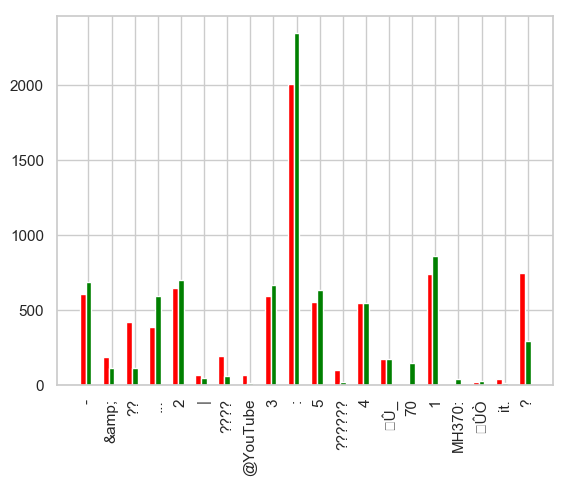

In [272]:
# bar graphs
fig, ax = plt.subplots()
x = np.arange(top_20_by_target.shape[0])
width = 0.25

target_0 = top_20_by_target.target_0.to_numpy();
target_1 = top_20_by_target.target_1.to_numpy();

ax.bar(x, target_0, width, color='red')
ax.bar(x + width, target_1 , width, color='green')
ax.set_xticks(x + width)
ax.set_xticklabels(map(unicode, top_20_by_target.word), rotation='vertical')
plt.show()

# Grafico de caracteres por tweets

Text(0.5,0.98,'Cantidad de caracteres en tweets')

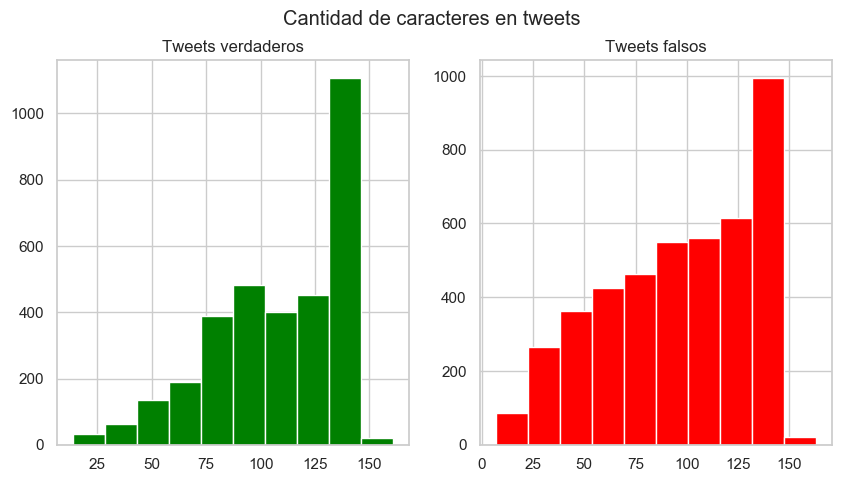

In [299]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet_list[tweet_list.target==1].text.str.len()
ax1.hist(tweet_len,color='green')
ax1.set_title('Tweets verdaderos')
tweet_len=tweet_list[tweet_list.target==0].text.str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Tweets falsos')
fig.suptitle('Cantidad de caracteres en tweets')

# Grafico de palabras por tweets

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_words = tweet_list[tweet_list.target==1].text.str.split().map(lambda x: len(x))
ax1.hist(tweet_words, color='green')
ax1.set_title('Tweets verdaderos')
tweet_words = tweet_list[tweet_list.target==0].text.str.split().map(lambda x: len(x))
ax2.hist(tweet_words, color='red')
ax2.set_title('Tweets falsos')
fig.suptitle('Palabras por tweet')

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
tweet_words = tweet_list[tweet_list.target==1].text.str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(tweet_words.map(lambda x: np.mean(x)), color='green')
plt.title('Tweets verdaderos')
plt.subplot(1,2,2)
tweet_words = tweet_list[tweet_list.target==0].text.str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(tweet_words.map(lambda x: np.mean(x)), color='red')
plt.title('Tweets falsos')
plt.suptitle('Promedio de largo de palabras por tweet')